# Introductory Notebook on Linear Regression

###  Linear Regression for Data Points generated from Sinusoidal Wave
###  Using Various Kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Generating Datapoints

Training Set Size: (10, 2) 
Test Set Size: (10, 2)
Note: Should always have Train Test ratio of 7:3 or 8:2


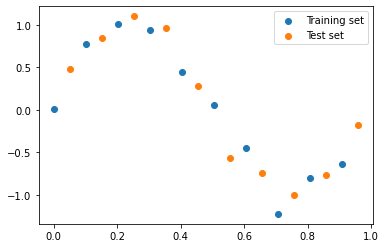

In [2]:
x = np.linspace(0,1,100)
e = np.random.normal(0,0.1,100)
t = np.sin(2*math.pi*x) + e

data = np.vstack((x,t)).T
#plt.scatter(data[:,0],data[:,1])
plt.show()


train = data[0:100:10,:]
test = data[5:100:10,:]
print("Training Set Size:",train.shape,"\nTest Set Size:",test.shape)
print("Note: Should always have Train Test ratio of 7:3 or 8:2")
plt.scatter(train[:,0],train[:,1],label="Training set")
plt.scatter(test[:,0],test[:,1],label="Test set")
plt.legend()
plt.show()

## Polynomial Kernel

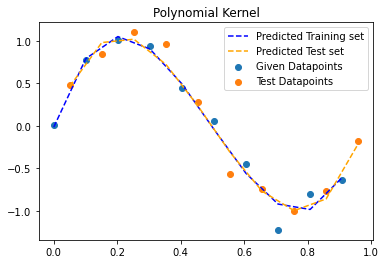

In [3]:
#Polynomial Kernel
x = train[:,0]
y = train[:,1]
xt = test[:,0]
yt = test[:,1]

N = len(x)
one = np.ones(N)

X = np.vstack((one,x))
x2 = x**2
X = np.vstack((X,x2))
x3 = x**3
X = np.vstack((X,x3))
#x4 = x**4
#X = np.vstack((X,x4))
#x5 = x**5
#X = np.vstack((X,x5))



X =X.T


w = np.linalg.inv(np.matmul(X.T,X))@(np.matmul(X.T,y))
y_pred = np.matmul(X,w)



Xtest = np.vstack((one,xt))
xt2 = xt**2
Xtest = np.vstack((Xtest,xt2))
xt3 = xt**3
Xtest = np.vstack((Xtest,xt3))
Xtest =Xtest.T
y_predtest = np.matmul(Xtest,w)


plt.scatter(X[:,1],y,label="Given Datapoints")
plt.scatter(Xtest[:,1],yt,label = "Test Datapoints")
plt.plot(X[:,1],y_pred,"--b",label="Predicted Training set")
plt.plot(Xtest[:,1],y_predtest,linestyle="dashed",color="orange",label="Predicted Test set")

plt.title("Polynomial Kernel")
plt.legend()
plt.show()

## Gaussian Kernel

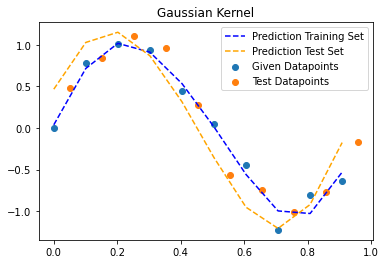

In [4]:
# Gaussian Kernel
x = train[:,0]
y = train[:,1]
xt = test[:,0]
yt = test[:,1]

N = len(x)

mean1 = np.mean(x)
std1 = np.std(x)
b = np.exp(-(x-mean1)**2/(std1**2))
b1 = np.exp(-(x+0.2)**2/(std1**2))    # Experimental Values, Vary as Desired
b2 = np.exp(-(x-0.8)**2/(std1**2))    # But be sure to change corresponding values for Test Set

one = np.ones(N)
X = np.vstack((one,b))
X = np.vstack((X,b1))
X = np.vstack((X,b2))
#X = b.T
X = X.T

theta = np.linalg.inv(np.matmul(X.T,X))@(np.matmul(X.T,y))
y_pred = np.matmul(X,theta)


plt.scatter(x, y,label="Given Datapoints")
plt.scatter(Xtest[:,1],yt,label = "Test Datapoints")
plt.plot(x,y_pred,linestyle = "dashed",color="b",label="Prediction Training Set")


meant = np.mean(xt)
stdt=np.std(xt)
bt = np.exp(-(xt-meant)**2/(stdt**2))
bt1 = np.exp(-(xt+0.2)**2/(stdt**2))
bt2 = np.exp(-(xt-0.8)**2/(stdt**2))

one = np.ones(N)
Xt = np.vstack((one,bt))
Xt = np.vstack((Xt,bt1))
Xt = np.vstack((Xt,bt2))
#X = b.T
Xt = Xt.T

y_predtest = np.matmul(Xt,theta)
plt.plot(x,y_predtest,linestyle = "dashed",color="orange",label="Prediction Test Set")

plt.title("Gaussian Kernel")
plt.legend()
plt.show()

## Sigmoid Kernel

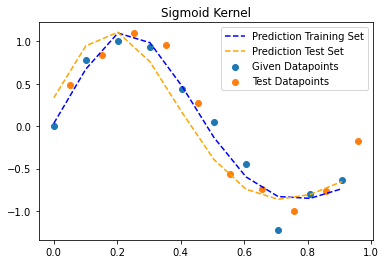

In [5]:
# Sigmoid Kernel
x = train[:,0]
y = train[:,1]
xt = test[:,0]
yt = test[:,1]

def sigmoid(x):
    return(1/(1+np.exp(-x)))


N = len(x)

mean1 = np.mean(x)
std1=np.std(x)

sig1 = sigmoid((x-mean1)/std1)
sig2 = sigmoid((x-0.2)/std1)      # Experimental Values
sig3 = sigmoid((x+0.2)/std1)      # Also modify data values during Testing
sig4 = sigmoid((x+0.4)/std1)


one = np.ones(N)
X = np.vstack((one,sig1))
X = np.vstack((X,sig2))
X = np.vstack((X,sig3))
X = np.vstack((X,sig4))

#X = b.T
X = X.T

theta = np.linalg.inv(np.matmul(X.T,X))@(np.matmul(X.T,y))
y_pred = np.matmul(X,theta)


plt.scatter(x, y,label="Given Datapoints")
plt.scatter(Xtest[:,1],yt, label = "Test Datapoints")

plt.plot(x,y_pred,linestyle = "dashed",c="blue",label="Prediction Training Set")


meant = np.mean(xt)
stdt=np.std(xt)

sigt1 = sigmoid((xt-mean1)/std1)
sigt2 = sigmoid((xt-0.2)/std1)
sigt3 = sigmoid((xt+0.2)/std1)
sigt4 = sigmoid((xt+0.4)/std1)

#one = np.ones(N)
Xt = np.vstack((one,sigt1))
Xt = np.vstack((Xt,sigt2))
Xt = np.vstack((Xt,sigt3))
Xt = np.vstack((Xt,sigt4))
#X = b.T
Xt = Xt.T

y_predtest = np.matmul(Xt,theta)
plt.plot(x,y_predtest,linestyle = "dashed",color= "orange",label="Prediction Test Set")

plt.title("Sigmoid Kernel")
plt.legend()
plt.show()